In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,...,2061.0,NaN,NaN,0,0,0,0,1,0,49
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,...,NaN,2430.0,NaN,0,0,1,0,0,0,30
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,...,NaN,NaN,2800.0,0,0,1,0,0,0,20
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,...,NaN,550.0,NaN,1,0,0,0,0,0,22
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3.0,3.0,3,...,1811.0,1711.0,1611.0,0,0,0,0,0,2,149


In [4]:
df.shape

(3865, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sector            3865 non-null   object 
 1   property_type     3865 non-null   object 
 2   society           3864 non-null   object 
 3   price             3826 non-null   float64
 4   price_per_sqft    3826 non-null   float64
 5   area              3826 non-null   float64
 6   areaWithType      3865 non-null   object 
 7   bedRoom           3865 non-null   float64
 8   bathroom          3865 non-null   float64
 9   balcony           3865 non-null   object 
 10  floorNum          3844 non-null   float64
 11  facing            2731 non-null   object 
 12  agePossession     3865 non-null   object 
 13  SuperBuiltUpArea  1921 non-null   float64
 14  builtUpArea       1776 non-null   float64
 15  carpetArea        1964 non-null   float64
 16  others            3865 non-null   int64  


In [6]:
df.duplicated().sum()

139

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,...,2061.0,NaN,NaN,0,0,0,0,1,0,49
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,...,NaN,2430.0,NaN,0,0,1,0,0,0,30
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,...,NaN,NaN,2800.0,0,0,1,0,0,0,20
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,...,NaN,550.0,NaN,1,0,0,0,0,0,22
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3.0,3.0,3,...,1811.0,1711.0,1611.0,0,0,0,0,0,2,149


# Property Type

<Axes: ylabel='count'>

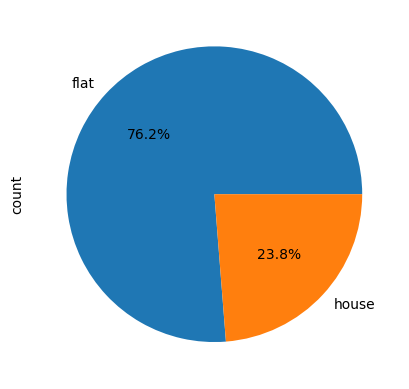

In [10]:
df['property_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Society

In [12]:
df['society'].value_counts()

society
independent                             510
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
ansal                                     1
parkwood westend                          1
naman residency                           1
bsf chs                                   1
kibithu villas                            1
Name: count, Length: 686, dtype: int64

In [13]:
df.loc[df['society'] != 'independent', 'society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023328
ss the leaf                             0.046034
shapoorji pallonji joyville gurugram    0.059098
dlf new town heights                    0.072162
signature global park                   0.083048
                                          ...   
indiabulls enigma                       0.487092
ramsons kshitij                         0.491135
dlf the primus                          0.495179
unitech uniworld resorts                0.498911
mvn athens                              0.502644
Name: proportion, Length: 75, dtype: float64

In [14]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 279,
 'Very Low (1)': 312}

<Axes: xlabel='society'>

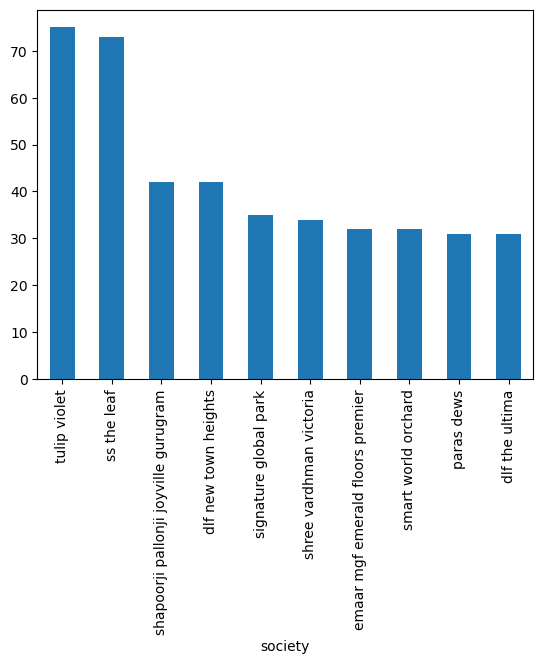

In [15]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [16]:
df['society'].isnull().sum()

1

In [17]:
df.loc[df['society'].isnull()]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
1197,sector 78,flat,NaN,0.6,3692.0,1625.14,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [18]:
df['sector'].shape

(3726,)

In [19]:
df['sector'].value_counts()

sector
sohna road    154
dlf phase     145
sector 85     108
sector 102    107
sector 92      99
             ... 
a block         3
b block         3
sector 88b      3
sector 27       3
sector 17b      3
Name: count, Length: 121, dtype: int64

In [20]:
df['sector'].value_counts(normalize=True).head(23).sum()

0.5061728395061729

In [21]:
sector_counts = df['sector'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 25,
 'Average (10-49)': 60,
 'Low (2-9)': 32,
 'Very Low (1)': 0}

<Axes: xlabel='sector'>

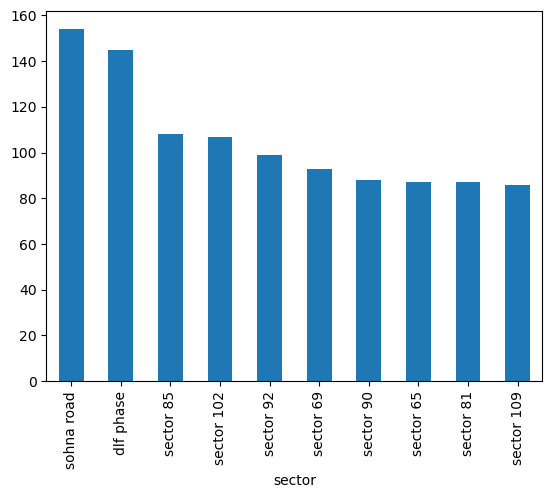

In [22]:
df['sector'].value_counts().head(10).plot(kind='bar')

# Price

In [24]:
df['price'].isnull().sum()

37

In [25]:
df['price'].describe()

count    3689.000000
mean        2.526170
std         2.975976
min         0.070000
25%         0.950000
50%         1.510000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

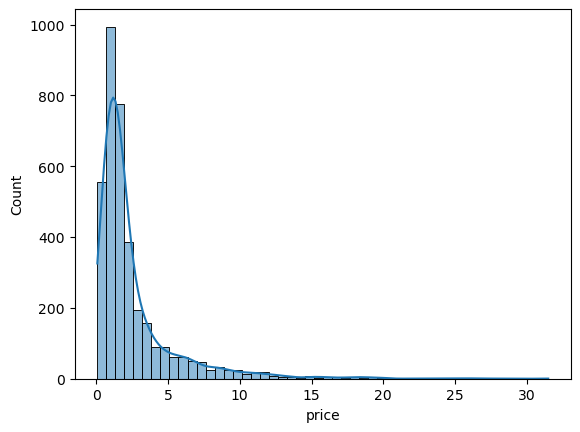

In [26]:
sns.histplot(df['price'], kde=True, bins=50)

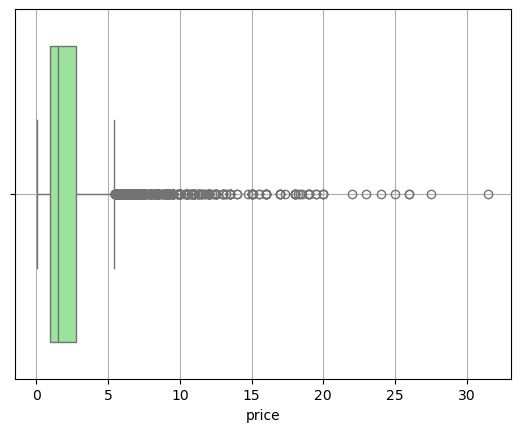

In [27]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [28]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

In [29]:
skewness

3.285955439631178

In [30]:
kurtosis

14.99373528612524

In [31]:
quantiles = df['price'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

quantiles

0.01     0.25
0.05     0.37
0.25     0.95
0.50     1.51
0.75     2.75
0.95     8.50
0.99    15.50
Name: price, dtype: float64

In [32]:
Q1 = quantiles[0.25]

In [33]:
Q3 = quantiles[0.75]

In [34]:
IQR = Q3 - Q1

In [35]:
lower_bound = Q1 - 1.5 * IQR

In [36]:
upper_bound = Q3 + 1.5*IQR

In [37]:
lower_bound, upper_bound

(-1.7500000000000002, 5.45)

In [38]:
outliers = df[((df['price'] < lower_bound) | (df['price'] > upper_bound))]

In [39]:
outliers.shape

(427, 23)

In [40]:
outliers['price'].describe()

count    427.000000
mean       9.227963
std        4.066584
min        5.460000
25%        6.450000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

In [41]:
# price binning

<Axes: xlabel='price'>

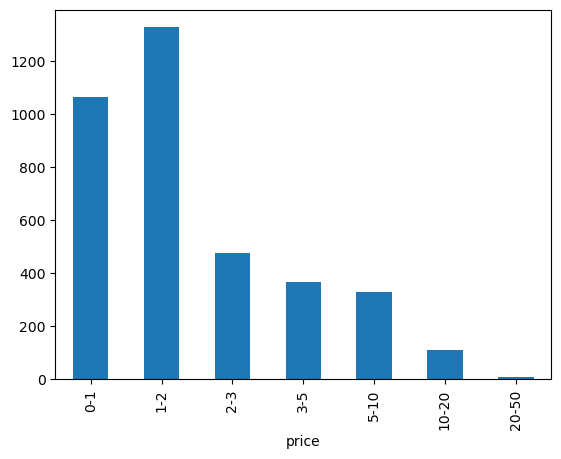

In [42]:
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=True).value_counts().sort_index().plot(kind='bar')

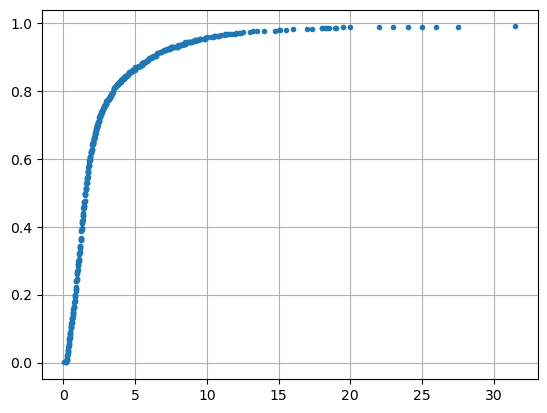

In [43]:
# ecdf plot

ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker = '.', linestyle='none')
plt.grid()

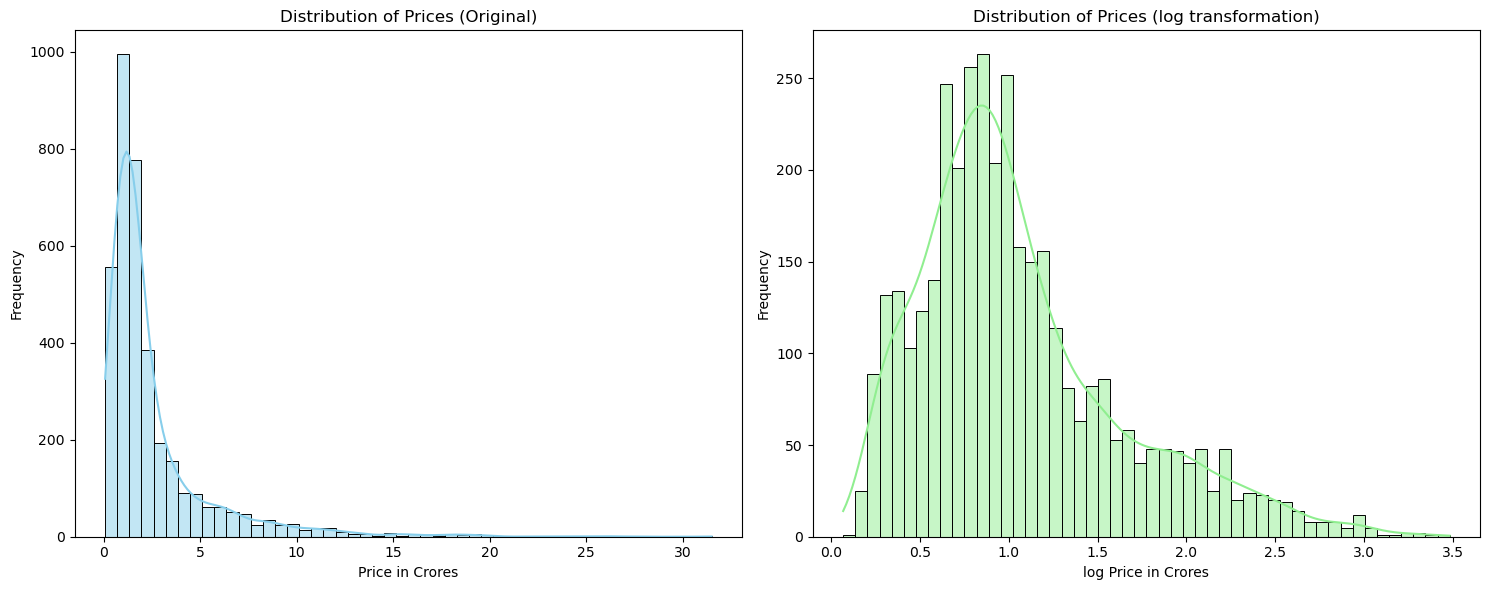

In [44]:
plt.figure(figsize=(15, 6))

#distribution plot without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price in Crores')
plt.ylabel('Frequency')


#Distribution plot with log transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (log transformation)')
plt.xlabel('log Price in Crores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
log_skewness = np.log1p(df['price']).skew()
log_kurtosis = np.log1p(df['price']).kurt()

log_skewness, log_kurtosis

(1.0755204151148483, 0.9704731304720768)

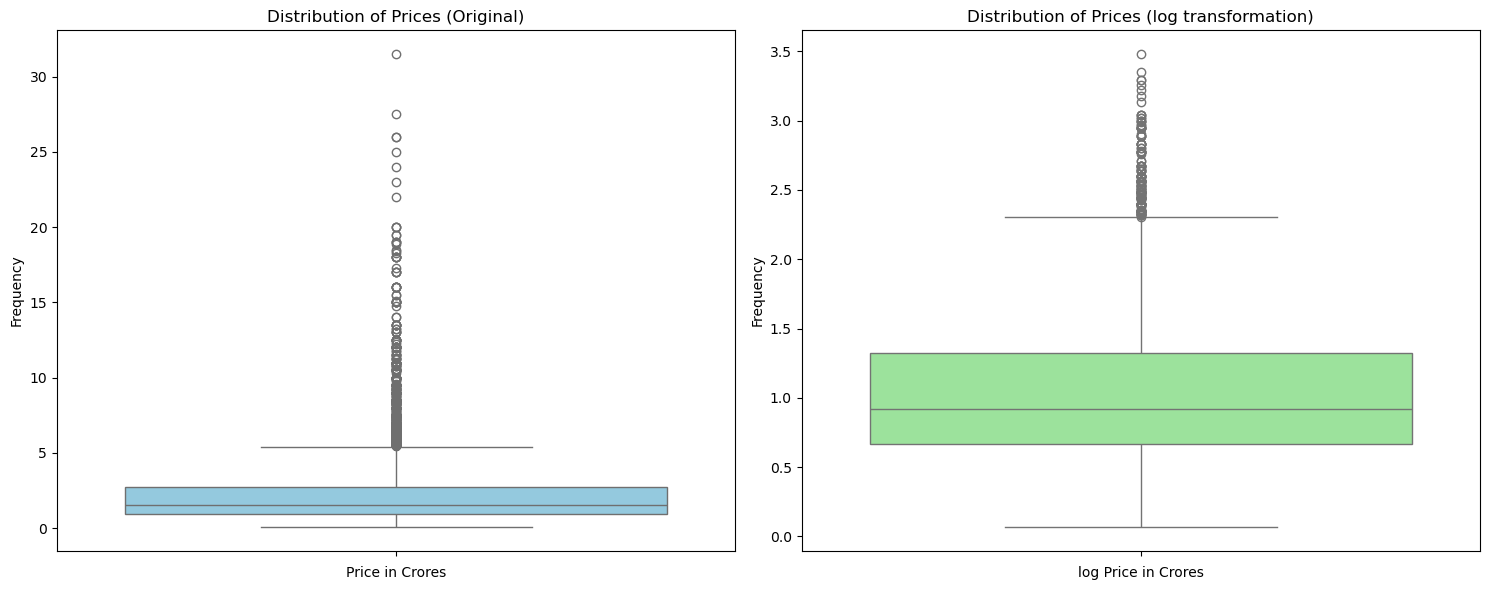

In [46]:
plt.figure(figsize=(15, 6))

#distribution plot without log transformation
plt.subplot(1,2,1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price in Crores')
plt.ylabel('Frequency')


#Distribution plot with log transformation
plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (log transformation)')
plt.xlabel('log Price in Crores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [47]:
# max value got capped at 3.5, instead of 31
# log1p is used so as to avoid any negative values

# price_per_sqft

In [49]:
df['price_per_sqft'].isnull().sum()

37

In [50]:
df['price_per_sqft'].describe()

count      3689.000000
mean      13882.194091
std       23085.323373
min           4.000000
25%        6812.000000
50%        9011.000000
75%       13878.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [51]:
df['price_per_sqft'].value_counts()

price_per_sqft
10000.0    27
8000.0     20
5000.0     17
12500.0    15
22222.0    14
           ..
8347.0      1
6315.0      1
5855.0      1
14222.0     1
10142.0     1
Name: count, Length: 2666, dtype: int64

In [52]:
edcf = df['price_per_sqft'].value_counts().sort_index().cumsum() / len(df['price_per_sqft'])

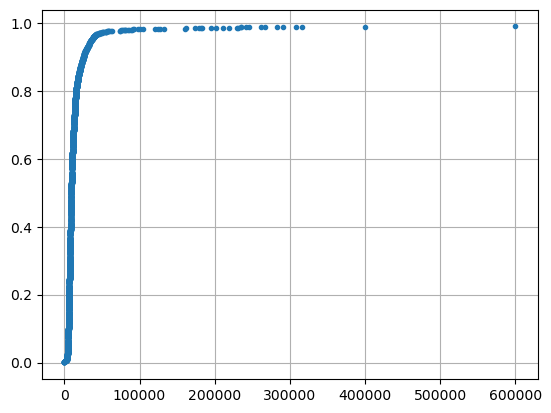

In [53]:
plt.plot(edcf.index, edcf, marker = '.', linestyle='none')
plt.grid()

Text(0, 0.5, 'Frequency')

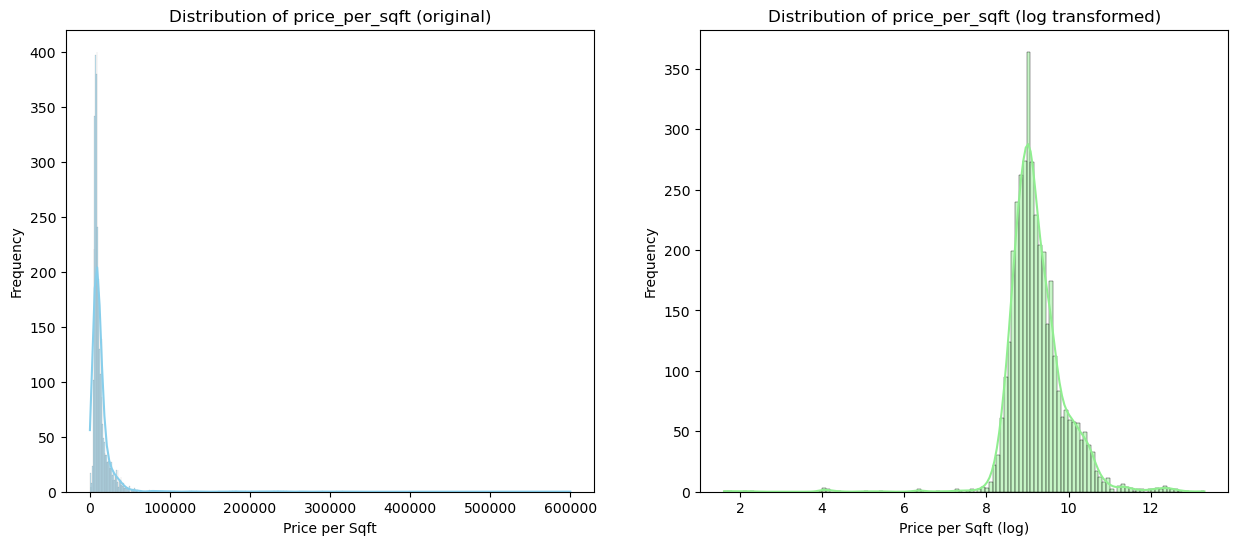

In [54]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df['price_per_sqft'], kde=True, color='skyblue')
plt.title('Distribution of price_per_sqft (original)')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price_per_sqft']), kde=True, color='lightgreen')
plt.title('Distribution of price_per_sqft (log transformed)')
plt.xlabel('Price per Sqft (log)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

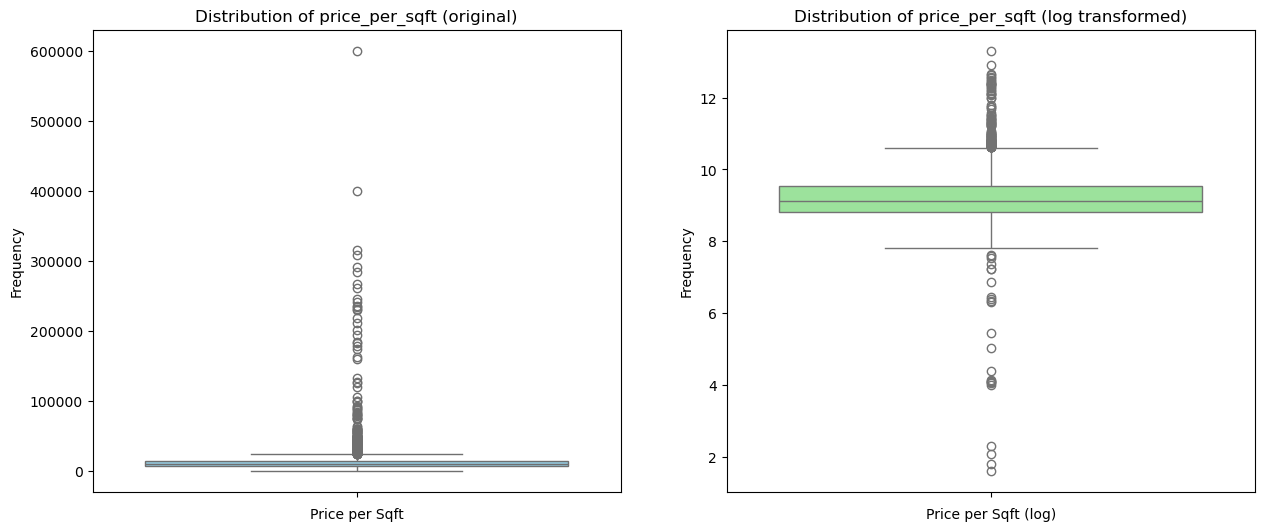

In [55]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(df['price_per_sqft'], color='skyblue')
plt.title('Distribution of price_per_sqft (original)')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price_per_sqft']), color='lightgreen')
plt.title('Distribution of price_per_sqft (log transformed)')
plt.xlabel('Price per Sqft (log)')
plt.ylabel('Frequency')

# bedrooms

In [57]:
df['bedRoom'].isnull().sum()

0

In [58]:
df['bedRoom'].value_counts()

bedRoom
3.0     1510
2.0      960
4.0      668
5.0      213
1.0      124
6.0       77
9.0       42
7.0       30
8.0       30
12.0      28
10.0      20
16.0      12
13.0       4
19.0       2
18.0       2
20.0       1
21.0       1
14.0       1
11.0       1
Name: count, dtype: int64

In [59]:
df['bedRoom'].describe()

count    3726.000000
mean        3.360440
std         1.894034
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

<Axes: ylabel='proportion'>

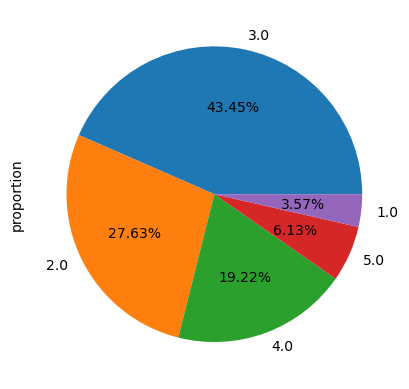

In [60]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

In [61]:
df['bedRoom'].value_counts(normalize=True).head()

bedRoom
3.0    0.405260
2.0    0.257649
4.0    0.179281
5.0    0.057166
1.0    0.033280
Name: proportion, dtype: float64

Text(0, 0.5, 'Frequency')

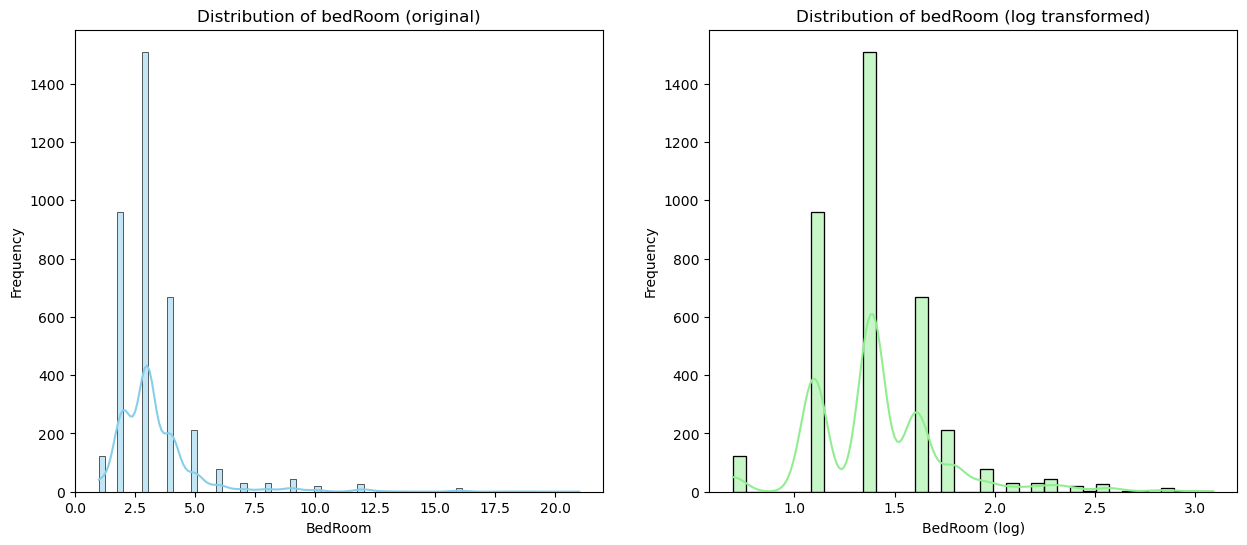

In [62]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df['bedRoom'], color='skyblue', kde=True)
plt.title('Distribution of bedRoom (original)')
plt.xlabel('BedRoom')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['bedRoom']), color='lightgreen', kde=True)
plt.title('Distribution of bedRoom (log transformed)')
plt.xlabel('BedRoom (log)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

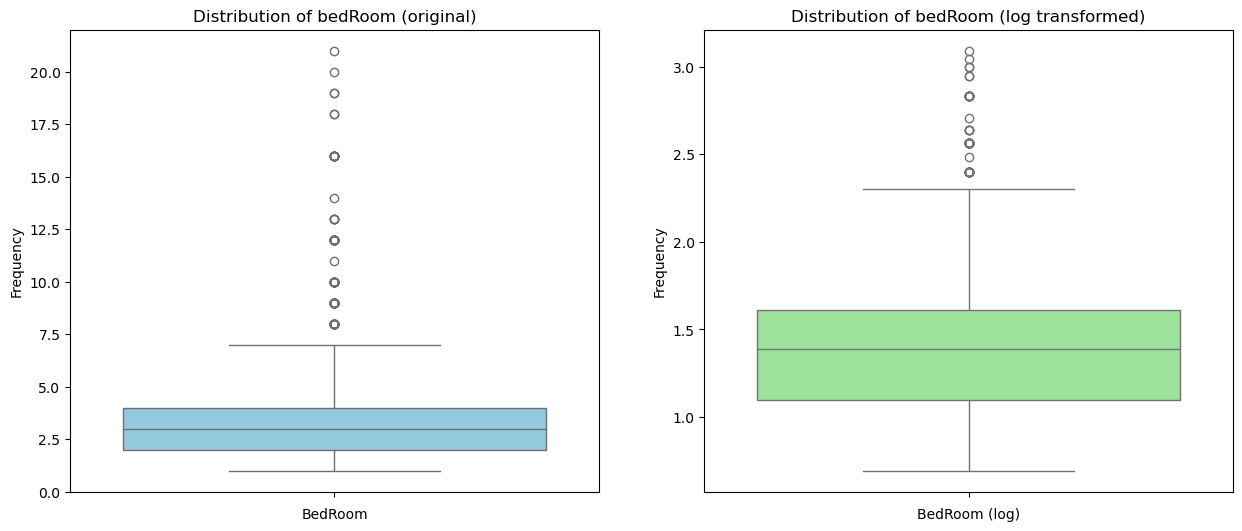

In [63]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(df['bedRoom'], color='skyblue')
plt.title('Distribution of bedRoom (original)')
plt.xlabel('BedRoom')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['bedRoom']), color='lightgreen')
plt.title('Distribution of bedRoom (log transformed)')
plt.xlabel('BedRoom (log)')
plt.ylabel('Frequency')

# BathRoom

In [65]:
df['bathroom'].value_counts()

bathroom
3.0     1087
2.0     1069
4.0      826
5.0      295
1.0      161
6.0      119
9.0       42
7.0       41
8.0       26
12.0      22
10.0       9
16.0       8
18.0       4
11.0       4
13.0       4
17.0       3
20.0       3
14.0       2
21.0       1
Name: count, dtype: int64

In [66]:
df['bathroom'].describe()

count    3726.000000
mean        3.418143
std         1.946157
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bathroom, dtype: float64

<Axes: ylabel='proportion'>

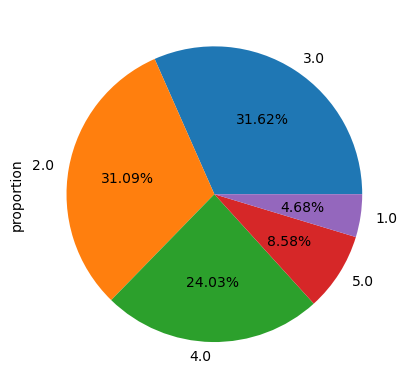

In [67]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

# Balcony 

In [69]:
df['balcony'].value_counts()

balcony
3+     1178
3       932
2       701
1       292
2.0     198
0       188
3.0     152
1.0      85
Name: count, dtype: int64

<Axes: ylabel='proportion'>

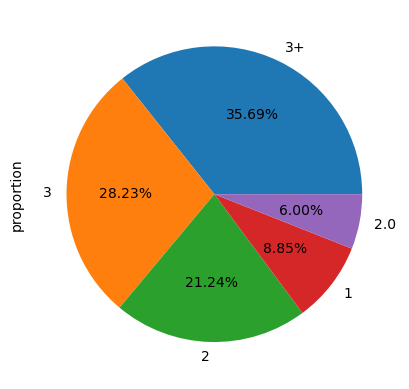

In [70]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

# facing

In [72]:
df['facing'].fillna('NA', inplace=True)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_60518/3102712490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA', inplace=True)


In [73]:
df['facing'].value_counts()

facing
NA            1072
East           631
North-East     629
North          391
West           249
South          232
North-West     194
South-East     175
South-West     153
Name: count, dtype: int64

# agePossession

In [75]:
df['agePossession'].isna().sum()

0

In [76]:
df['agePossession'].value_counts()

agePossession
Relatively New        1652
New Property           599
Moderately Old         571
Undefined              321
Old Property           312
Under Construction     271
Name: count, dtype: int64

# Areas 

In [78]:
df['SuperBuiltUpArea'].isnull().sum()

1845

In [79]:
df['SuperBuiltUpArea'].value_counts()

SuperBuiltUpArea
1950.0    37
1650.0    37
1578.0    25
2000.0    25
1640.0    22
          ..
2965.0     1
1475.0     1
1672.0     1
1125.0     1
3160.0     1
Name: count, Length: 587, dtype: int64

In [80]:
df['SuperBuiltUpArea'].describe()

count     1881.000000
mean      1923.810207
std        763.695118
min         89.000000
25%       1478.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: SuperBuiltUpArea, dtype: float64

Text(0, 0.5, 'Frequency')

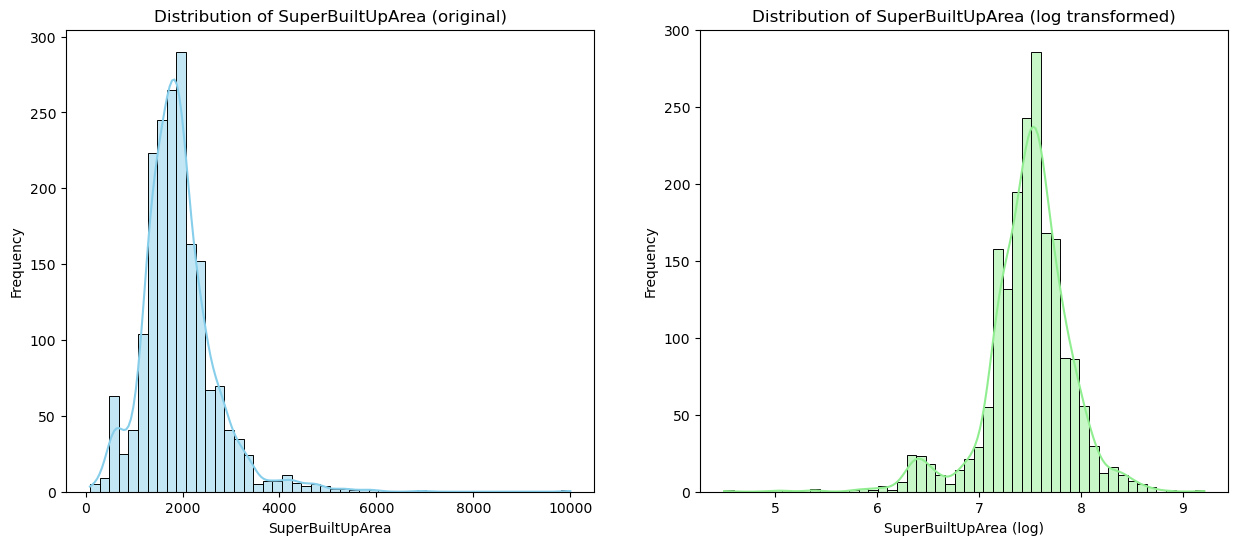

In [82]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df['SuperBuiltUpArea'].dropna(), bins=50, color='skyblue', kde=True)
plt.title('Distribution of SuperBuiltUpArea (original)')
plt.xlabel('SuperBuiltUpArea')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['SuperBuiltUpArea'].dropna()), bins=50, color='lightgreen', kde=True)
plt.title('Distribution of SuperBuiltUpArea (log transformed)')
plt.xlabel('SuperBuiltUpArea (log)')
plt.ylabel('Frequency')

In [83]:
df['builtUpArea'].value_counts()

builtUpArea
1800.0    42
3240.0    38
1900.0    34
1350.0    34
2700.0    33
          ..
2390.0     1
1822.0     1
3160.0     1
2125.0     1
476.0      1
Name: count, Length: 638, dtype: int64

In [86]:
df['builtUpArea'].describe()

count      1721.000000
mean       2596.673446
std       18684.731265
min          18.000000
25%        1115.000000
50%        1662.000000
75%        2430.000000
max      737147.000000
Name: builtUpArea, dtype: float64

In [88]:
df['builtUpArea'].isna().sum()

2005

Text(0, 0.5, 'Frequency')

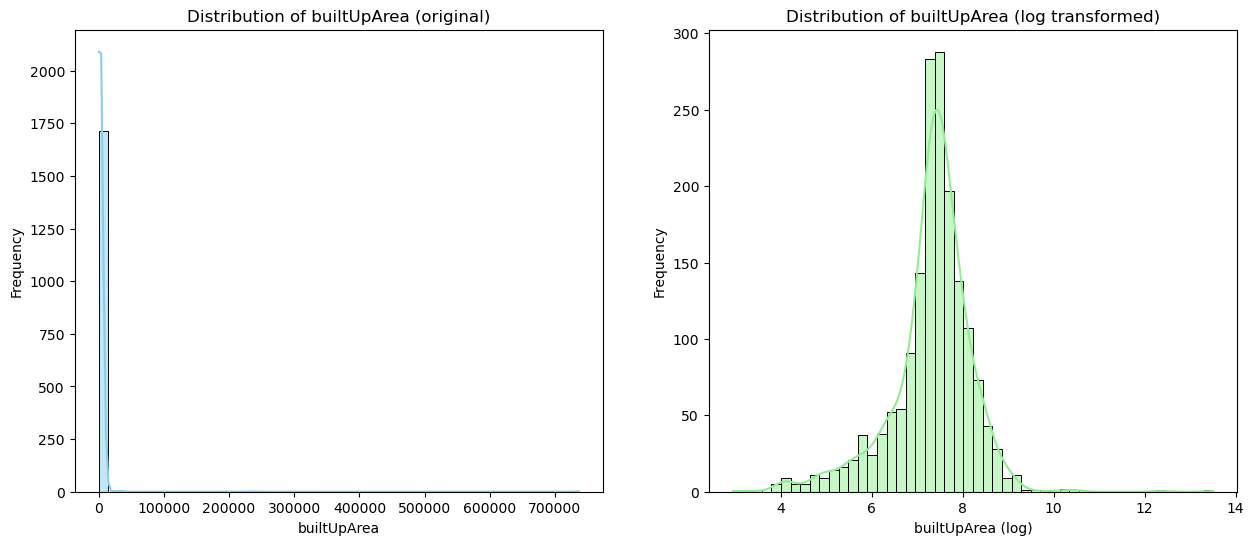

In [90]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df['builtUpArea'].dropna(), bins=50, color='skyblue', kde=True)
plt.title('Distribution of builtUpArea (original)')
plt.xlabel('builtUpArea')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['builtUpArea'].dropna()), bins=50, color='lightgreen', kde=True)
plt.title('Distribution of builtUpArea (log transformed)')
plt.xlabel('builtUpArea (log)')
plt.ylabel('Frequency')

In [91]:
df['carpetArea'].value_counts()

carpetArea
1400.0     42
1800.0     36
1600.0     35
1200.0     31
1500.0     29
           ..
1107.0      1
865.0       1
58141.0     1
565.0       1
1452.0      1
Name: count, Length: 700, dtype: int64

In [92]:
df['carpetArea'].describe()

count      1891.000000
mean       2516.527763
std       22685.511817
min          15.000000
25%         830.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpetArea, dtype: float64

In [93]:
df['carpetArea'].isna().sum()

1835

Text(0, 0.5, 'Frequency')

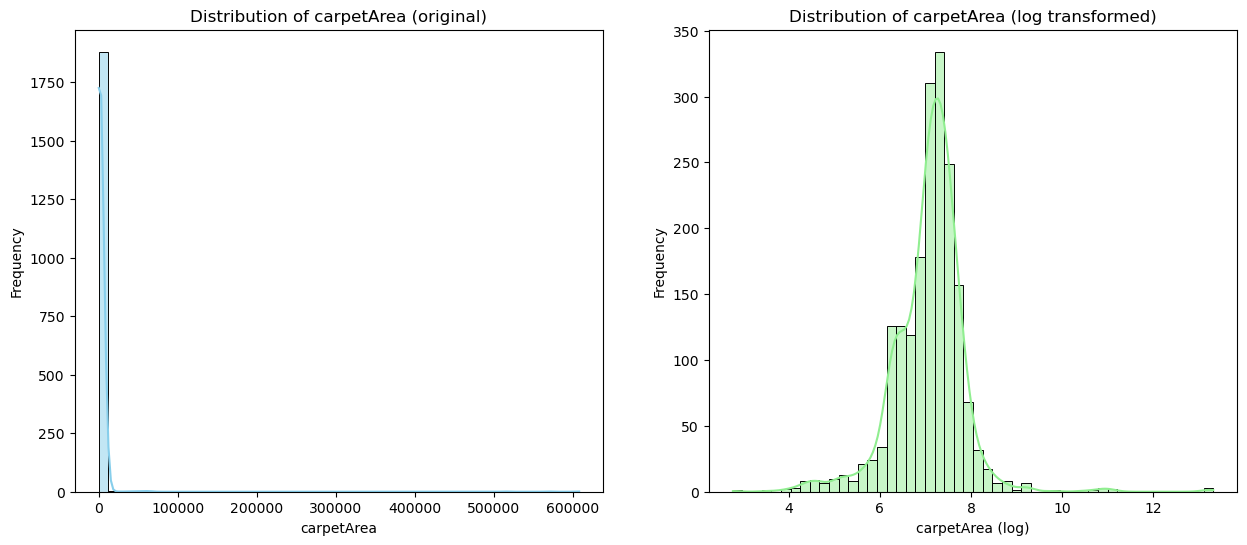

In [95]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df['carpetArea'].dropna(), bins=50, color='skyblue', kde=True)
plt.title('Distribution of carpetArea (original)')
plt.xlabel('carpetArea')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['carpetArea'].dropna()), bins=50, color='lightgreen', kde=True)
plt.title('Distribution of carpetArea (log transformed)')
plt.xlabel('carpetArea (log)')
plt.ylabel('Frequency')

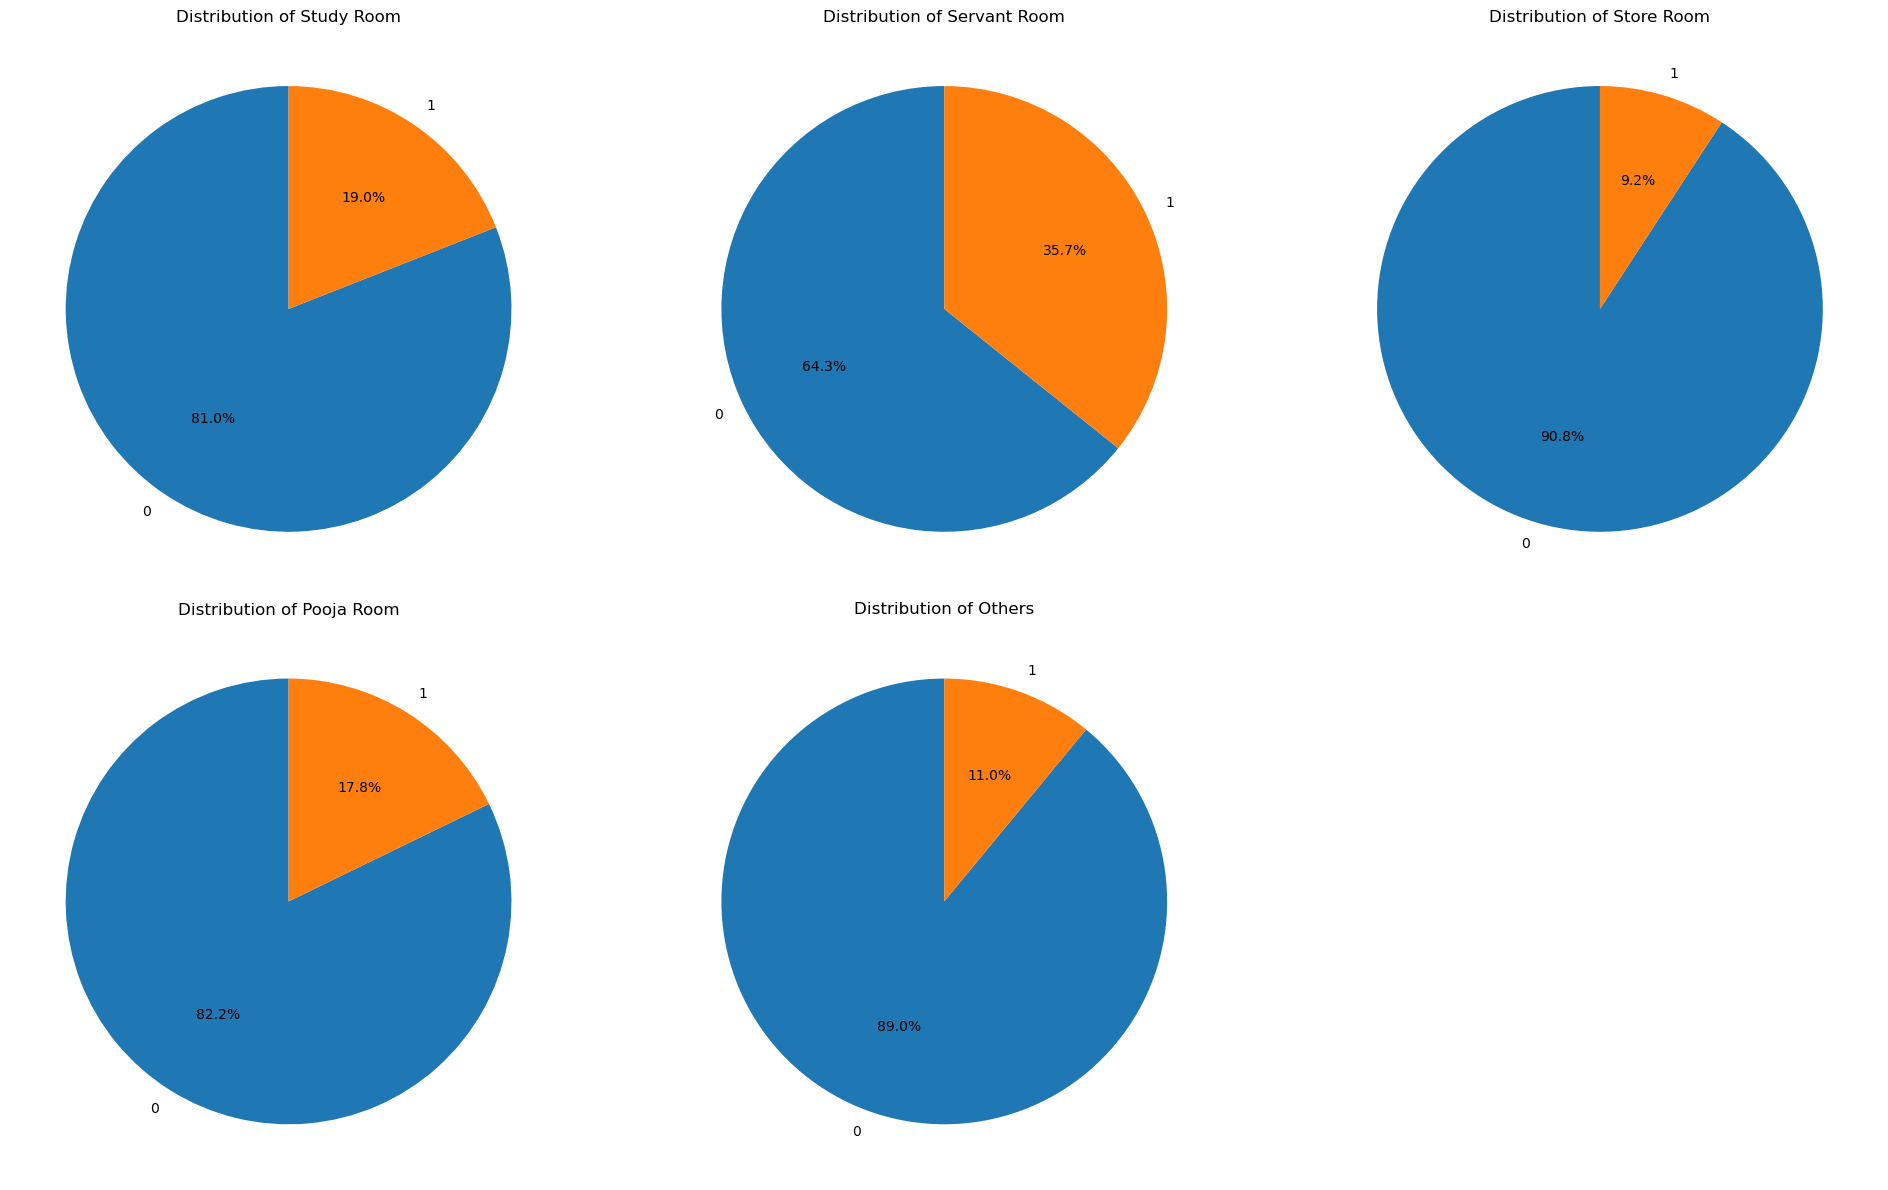

In [99]:
plt.figure(figsize=(20, 12))
for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing type

In [101]:
df['furnishing_type'].value_counts()

furnishing_type
0    2479
2    1044
1     203
Name: count, dtype: int64

<Axes: ylabel='count'>

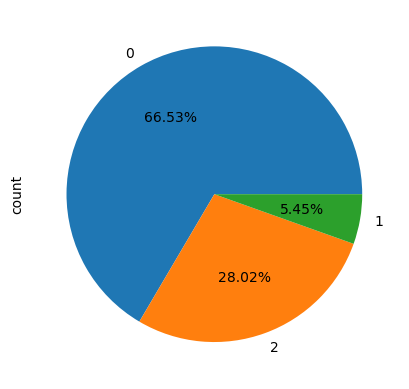

In [103]:
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')

# luxury score

In [105]:
df['luxury_score'].value_counts()

luxury_score
0      489
49     348
174    195
44      61
38      55
      ... 
154      3
161      3
147      2
169      1
155      1
Name: count, Length: 161, dtype: int64

In [108]:
df['luxury_score'].describe()

count    3726.000000
mean       70.863124
std        53.139952
min         0.000000
25%        31.000000
50%        58.000000
75%       109.750000
max       174.000000
Name: luxury_score, dtype: float64

In [112]:
df['luxury_score'].isnull().sum()

0

<Axes: xlabel='luxury_score', ylabel='Count'>

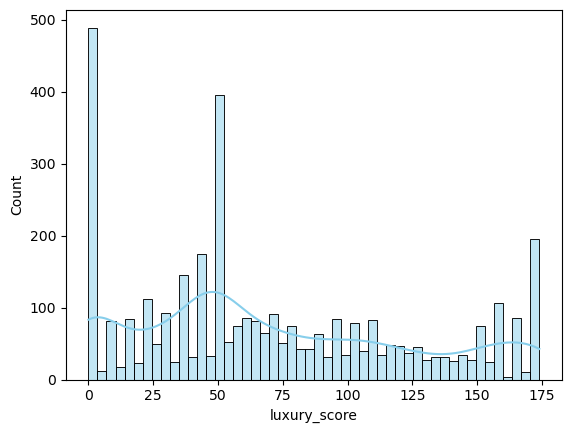

In [114]:
sns.histplot(df['luxury_score'], bins=50, kde=True, color='skyblue')